# Chapter 2: Language Modelling

A model is built by observing some samples generated by the phenomenon to be modelled. In the same way, a language model is built by observing some text.

A language model learns to predict the probability of a sequence of words. 
They are used in many NLP tasks, such as machine translation (good vs. bad translations), spell checking and correction, speech recognition ("I saw a van" vs. "Eyes awe of an"), chat-bots (text generation), auto-completion (Google: "Did you mean?") etc.

We will have a look at three basic tasks:
- Spell checking 
- Text generation
- Predicting next word 


## Probability of a word

Probability is a type of ratio where we compare how many times an outcome can occur compared to all possible outcomes.
We can calculate the probability of a word in a given language by:

\begin{align}
Probability_{word} = \frac{\text{Count of word}}{\text{Total count of all words}} \\
\end{align}


We will use the NLTK library and the NLTK corpora for exercises.

`from nltk.corpus import gutenberg` will download a list of "popular" resources, these includes:<br>
- gutenberg
- movie_reviews
- names
- shakespeare
- stopwords
- twitter_samples



In [1]:
import nltk
nltk.download('popular') 


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [2]:
from nltk.corpus import gutenberg
emma = gutenberg.words('austen-emma.txt') #  Emma by Jane Austen 
# returns a list of all words in the document

print(emma[:100])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her']


Lets make a dictionary for __all the unique words (in lowercase)__ in this document with two values: 

(1) its frequency in the document and <br>
(2) its probability

In [3]:
import nltk
import sys
from nltk.corpus import gutenberg
emma = gutenberg.words('austen-emma.txt') # returns a list of all words in the document

# Lets collect a list of all unique words in lowercase
# 1. We have a list of all words, let's convert them to lowercase

words_lower = [x.lower() for x in emma]
# 2. Convert this list to a list of unique words
unique_words_lower = list(set(words_lower))

# 3. Print:
# first 100 items in 'emma' 
# Length of emma
# first 100 items in the list containing unique words 
# The length of this list
print(emma[:100])
print(len(emma))
print(unique_words_lower[:100])
print(len(unique_words_lower))






['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her']
192427
['liberties', 'heir', 'learnt', 'southward', 'consisting', 'token', 'hero', 'spoiled', 'unmentioned', 'clouds', 'temporary', 'departed', 'goodnatured', 'indulged', 'trusting', '[', 'disservice', 's

In [4]:
# Let's create the dictionary
prob_dict = dict() 


for word in unique_words_lower:
    freq = words_lower.count(word) # Get the count of each word. How?
    prob = freq/len(words_lower) # Calculate the prob of each word. What is the formula?

    # Add the word to the dictionary with two values in a list [frequency, probability]
    prob_dict[word] = [freq, prob]

print(prob_dict["the"])
print(prob_dict["exception"]) # 2.59e-05 means we need to move this number five digits to the left 0.00000259


[5201, 0.02702843156105952]
[5, 2.598387960109548e-05]


In [5]:
# Let's save this dictionary as a json file
# sort_keys, indent for a readable output
import json
with open('./emma_word_prob.json', 'w') as out:
    json.dump(prob_dict, out, sort_keys=True, indent=2)

In [6]:
with open('./emma_word_prob.json', 'r') as fp:
    emma_word_prob = json.load(fp)
    
    
# CAN YOU WRITE THE FIRST 10 KEYS AND VALUES OF THE DICTIONARY
print(list(emma_word_prob.items())[:10]) # items() returns a view of the dictionary but not a 



[('!', [549, 0.0028530299802002838]), ('!"', [144, 0.0007483357325115498]), ('!"--', [16, 8.314841472350553e-05]), ("!'", [6, 3.1180655521314574e-05]), ("!'--", [3, 1.5590327760657287e-05]), ('!)--', [1, 5.196775920219096e-06]), ('!--', [338, 0.0017565102610340544]), ('!--"', [1, 5.196775920219096e-06]), ('!--(', [4, 2.0787103680876384e-05]), ('!--`', [1, 5.196775920219096e-06])]


__QUESTION:__ 

How can we use word probabilities to check spelling of written words?

In [8]:
### Spell checking (1)
Which of the following words are spelled incorrectly?

- word # correct 
- wooord # incorrect
- wrong # correct
- worng # incorrect
- wind # correct
- weird # correct

Let's write a code to check if the following words are correctly spelled.

SyntaxError: ignored

In [10]:
words = ["Word", "Woord", "WRONG", "worng", "wind", "weird"]
for word in words:
    if word.lower() in emma_word_prob:
        # Print the probability of the word if it is in our dictionary
        prob = emma_word_prob[word.lower()][1]
        # Round it to 5 decimals
        prob_rounded = round(prob, 5)
        print(word + " > "  + str(prob_rounded))

    else:
        # Print "wrong spelling otherwise"
        print(word + " - wrong spelling")
print()

Word > 0.00049
Woord - wrong spelling
WRONG > 0.0002
worng - wrong spelling
wind > 3e-05
weird - wrong spelling



__QUESTION:__ Which of the same words do you think are wrongly spelled in these partial sentences?
- we like to write this word ...
- we like to write this wooord ...
- we like to write this wrong ...
- we like to write this worng ...
- we like to write this wind ...
- we like to write this weird ...

Is your answer different for some of the words compared to the previous question? Why?

## Text Generation (1)
Let's generate some "good" sentences by using random words from our dictionary.
What are the limitations of the following code?

In [11]:
import random

sentence = []
while len(sentence) < 10:
    id = random.randint(0, len(emma_word_prob))
    word = list(emma_word_prob.keys())[id]
    sentence.append(word)

text = " ".join(sentence)
print(text)

plans shift provided indisposed _were_ outstepped god clinging testify passes


### DIY
Write a code that makes a sentence with 10 words but only consisting of words that have a probability above 0.0005.
- Tip: Use a while loop instead of a for loop? (Why?)



In [13]:
import random
sentence = []
while len(sentence) < 10:
    id = random.randint(0, len(emma_word_prob))
    word = list(emma_word_prob.keys())[id]
    prob = emma_word_prob[word][1]
    if emma_word_prob[word][1] > 0.0005:
        sentence.append(word)
    else:
        #print(word, prob)
        continue
text = " ".join(sentence)
print(text)

have into really he over speak take room any subject


## N-Grams

A sequence of words in text are known as "n-grams", where "n" stands for the number of words in that sequence. (Unigrams are single words, bigrams are two words, trigrams are three words, 4-grams are four words, 5-grams are five words, etc.)



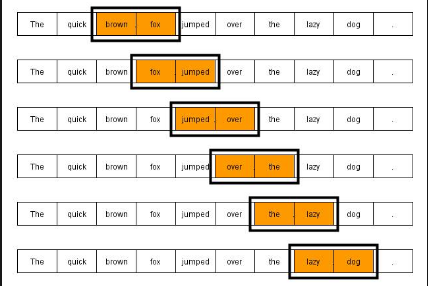

N-grams are useful in many NLP tasks as they are able to provide context when n is above 2. (why not when n is 1?)


In [14]:
# Let's write a function to return bi-grams of a given sentence.
sentence = "this is a test sentence ." 

def bigrams(sentence):
    bigrams_list = []
    tokens = sentence.split()
    for i in range(len(tokens)-1):
        bigram = tokens[i:i+2]
        bigrams_list.append(bigram)
    return bigrams_list

print(bigrams(sentence))



[['this', 'is'], ['is', 'a'], ['a', 'test'], ['test', 'sentence'], ['sentence', '.']]


This code is not able to capture the fact that "this" is the first word in the sentence and "sentence" is the last word.
How can we do this?


In [15]:
# Let's write a function to return bi-grams of a given sentence.
sentence = "this is a test sentence ." 

def bigrams(sentence):
    bigrams_list = []
    tokens = sentence.split()
    # Add sentence boundary
    tokens = ["<s>"] + tokens + ["</s>"]
    for i in range(0, len(tokens)-1): # This will make the last id in the loop as len-2
        bigram = tokens[i:i+2] # This will look at i, i+1 (not i+2)
        bigrams_list.append(bigram)
    return bigrams_list

print(bigrams(sentence))


[['<s>', 'this'], ['this', 'is'], ['is', 'a'], ['a', 'test'], ['test', 'sentence'], ['sentence', '.'], ['.', '</s>']]


### DIY
Now let's have a look at n-grams with higher n values.
The 3-grams for the same sentence should consist of the following set of words:

`[[<s>, <s>, this], [<s>, this, is], [this, is, a], [is, a, test], [a, test, sentence], [test, sentence, .], [sentence, ., </s>]]`

Did you notice anything interesting in the output above?

Can you update the code for 2-grams to capture 3-grams instead?

#### Tips: 
Indexes for the words: <br>
`<s>(0) <s>(1) this(2) is(3) a(4) test(5) sentence(6) .(7) </s>(8`)<br>

The length of the sentence is 9.<br>
Which should be the first word of the last 3-gram?

In [17]:
# Let's write a function to return 3-grams of a given sentence.
sentence = "this is a test sentence ." 

# Please modify the following code
def trigrams(sentence):
    trigrams_list = []
    tokens = sentence.split()
    tokens = ["<s>"]*2 + tokens + ["</s>"]
    # sentence becomes "<s> this is a test sentence . </s>"
    for i in range(0, len(tokens)-2): # This will mark the final id as 5 (8-2=6 not included)
        trigram = tokens[i:i+3] # This will look for i, i+1, and i+2 (i+3 not included)
        trigrams_list.append(trigram)
    return trigrams_list

print(trigrams(sentence))


[['<s>', '<s>', 'this'], ['<s>', 'this', 'is'], ['this', 'is', 'a'], ['is', 'a', 'test'], ['a', 'test', 'sentence'], ['test', 'sentence', '.'], ['sentence', '.', '</s>']]


## NLTK
We can in fact extract n-grams for an input sentence (and more) with existing libraries, such as NLTK.


In [18]:
import nltk

sentence = "this is a test sentence." # Dot is not separated in this case

tokens=nltk.word_tokenize(sentence)

# Requires a list of tokens as input
bigrams=nltk.ngrams(tokens,2)
print(tokens)
print(bigrams)
# The function ngrams has returned a "generator" object; 
# this is a Python data type which is like a List but which only creates its elements as they are needed. 
# If you want to realise a generator as a list, you need to explicitly cast it as a list:

# They allow lazy evaluation, only generating the next element of an iterable object when requested. 
# This is useful for very large data sets.
#It allows you to start using the data immediately, while the whole data set is being computed.

print(list(bigrams)) # Convert it to a list

['this', 'is', 'a', 'test', 'sentence', '.']
<generator object ngrams at 0x7f604b80d450>
[('this', 'is'), ('is', 'a'), ('a', 'test'), ('test', 'sentence'), ('sentence', '.')]


### DIY

This code is also not able to capture the fact that "this" is the first word in the sentence and "sentence" is the last word.
How can we do this?
Let's write a function that takes a list of tokens as input returns the list of n-grams for a given sentence:
- use the nltk to tokenize the sentence
- add sentence boundaries to the list of tokens
- return list of n-grams using nltk


In [19]:
import nltk

def nltk_ngrams_custom(sentence, n): 
    tokens = nltk.word_tokenize(sentence)
    tokens = ["<s>"]*(n-1) + tokens + ["</s>"]
    ngrams=nltk.ngrams(tokens,n)
    return(list(ngrams))

sentence = "this is a test sentence." 
tokens = nltk.word_tokenize(sentence)
print("Unigrams:")
ngrams = nltk_ngrams_custom(sentence, 1)
print(ngrams)    
print("Bigrams:")
ngrams = nltk_ngrams_custom(sentence, 2)
print(ngrams)  
print("Trigrams:")
ngrams = nltk_ngrams_custom(sentence, 3)
print(ngrams)  
    

Unigrams:
[('this',), ('is',), ('a',), ('test',), ('sentence',), ('.',), ('</s>',)]
Bigrams:
[('<s>', 'this'), ('this', 'is'), ('is', 'a'), ('a', 'test'), ('test', 'sentence'), ('sentence', '.'), ('.', '</s>')]
Trigrams:
[('<s>', '<s>', 'this'), ('<s>', 'this', 'is'), ('this', 'is', 'a'), ('is', 'a', 'test'), ('a', 'test', 'sentence'), ('test', 'sentence', '.'), ('sentence', '.', '</s>')]


QUESTION: Which of the same words do you think are wrongly spelled in these partial sentences?

we like to write this word ... <br>
we like to write this wooord ... <br>
we like to write this wrong ... <br>
we like to write this worng ... <br>
we like to write this wind ... <br>
we like to write this weird ... <br>

The answer will be different when the words are given in __context__. In other words, the probability of a word in a sentence depends on the previous words!
In this example there is little probability of the word "wind" occuring after "we like to write this".

So how can we capture the context to measure the probability of a word occuring?

We will use __conditional probability__!

## Conditional Probability

Conditional probability is the probability of one event occurring with some relationship to one or more other events. <br>
Example: <br>
- 1: What is the probability of raining today? (We don't know the date)
- 2: What is the probability of raining today if it rained yesterday?
- 3: What is the probability of raining today if it rained for the last 5 days?

We can use the same idea in NLP. What is the prob. of the word "wind" occuring as a next word in a sentence:
- 1: If we don't know the previous words?
- 2: If the preceding word is "this"?
- 3: If the 4 preceding words are "like to write this"?

Conditional probability considers _context_ for calculating more accurate probabilities!
It is calculated as follows:
\begin{align}
P(w_2 | w_1) = \frac{C(w_1 w_2)}{C(w_1)}  \\
\end{align}

Probability of $w_2$ given that $w_1$ occurs is the count of $w_1 w_2$ divided by the count of $w_1$. <br>
Probability of "wind" given that "this" occurs (i.e. "wind" follows the word "this" in a sentence) is equal to the count of "this wind" divided by the count of "this". <br>
We can see the same formula as follows, where "X" is any other word following "We".

\begin{align}
P(\text{wind} | \text{this}) = \frac{C(\text{this wind})}{C(\text{this})}  \\
\end{align}

The count of "this", in fact, equal to "this" being followed by any possible words. So this formula means that we are dividing the count of "wind" following "this" to the count of "all other possible words" following "this". <br>
__In other words:__ From all the words that can follow "this", how many of them are "wind"? 

\begin{align}
P(\text{wind} | \text{this}) = \frac{C(\text{this wind})}{C(\text{this X})}  \\
\end{align}


## Conditional probability with larger __context__
This formula captures a context of one word (before our target word). We can increase the context size (Why?).
<br>
We can extend the coverage by increasing the N-gram size. The formula becomes the following when we look at two previous words (3-gram context):

\begin{align}
P(w_3 | w_1 w_2) = \frac{C(w_1 w_2 \bf{w_3})}{C(w_1 w_2)}  \\
\end{align}

\begin{align}
P(\text{wind} | \text{write this}) = \frac{C(\text{write this wind})}{C(\text{write this})}  \\
\end{align}

__QUESTION:__ Which context size gives more accurate information? 2-gram (this wind) or 3-gram (write this wind)?



## Conditional Probability for any N-Gram 
We can generalize this formula for all possible N for different N-grams <br>

\begin{align}
P(w_n | w_{1} ... w_{n-1} ) = \frac{C(w_{1} ... w_{n-1} w_n)}{C(w_{1} ... w_{n-1})}  \\
\end{align}

So for calculating conditional probability for n-grams:
1: we need to collect n-gram sequences (where $w_n$ is the last word) 
2: we also need to collect the n-1 grams sequences (where $w_{n-1} is the last word).


## Updating code for N-grams
Let's modify our code for extracting n-grams so that it returns two outputs instead of one. For a given list of tokens return:
- list of n-grams
- list of n-1-grams

Now let's write a code to calculate n-gram probabilities and to write them to json files.
Let's define 3 functions:
- __1. ngram_lists__: returns lists of all (lowercase) ngrams and all n-1 grams for given list of sentences (n as input variable) (we can re-use the code above)
- __2. ngram_counts__: takes ngrams list and n-1 grams list (the output of the previous function) as input and returns two dictionaries, in which the unique ngram and n-1 grams are keys and their count as values
- __3. ngram_prob__: takes the two dictionaries of ngram counts as input, calculates the prob. of the n-gram and returns a new dictionary with n-gram being the key and n-gram prob. being the value.

- __1. ngram_lists__: returns lists of all (lowercase) ngrams and all n-1 grams for given list of sentences (n as input variable) (we can re-use the code above)

In [96]:
import nltk

def nltk_ngrams_multi(tokens, n):
    if n < 2:
        sys.exit("n should be greater than 1.")
    
    tokens = ["<s>"]*(n-1) + tokens + ["</s>"] # We only need one closing sentence boundary
    ngrams=nltk.ngrams(tokens,n)
    nmin_grams=nltk.ngrams(tokens, n-1)
    return(list(ngrams), list(nmin_grams))
    
#TD, problem here for 3, 4 .. grams,
# for  n - 1
#('<s>', '<s>'), ('<s>', 'this'),   
# SEE CORR BELOW

tokens=nltk.word_tokenize("this is a test sentence.")
ngrams, nmin_grams = nltk_ngrams_multi(tokens, 2)
#TD issue for;
#ngrams, nmin_grams = nltk_ngrams_multi(tokens, 3)
print("N-grams")
print(ngrams)
print("N-1-grams")
print(nmin_grams)

N-grams
[('<s>', '<s>', 'this'), ('<s>', 'this', 'is'), ('this', 'is', 'a'), ('is', 'a', 'test'), ('a', 'test', 'sentence'), ('test', 'sentence', '.'), ('sentence', '.', '</s>')]
N-1-grams
[('<s>', '<s>'), ('<s>', 'this'), ('this', 'is'), ('is', 'a'), ('a', 'test'), ('test', 'sentence'), ('sentence', '.'), ('.', '</s>')]


In [97]:
#TD ISSUE when n = 3
import nltk

def nltk_ngrams_multi2(tokens, n):
    if n < 2:
        sys.exit("n should be greater than 1.")
    
    tokens = ["<s>"]*(n-1) + tokens + ["</s>"] # We only need one closing sentence boundary
    ngrams=nltk.ngrams(tokens,n)
    #TD inserted
    tokens_n_min1 = tokens[1:]
    nmin_grams=nltk.ngrams(tokens_n_min1, n-1)    
    #nmin_grams=nltk.ngrams(tokens, n-1)
    return(list(ngrams), list(nmin_grams))

tokens=nltk.word_tokenize("this is a test sentence.")
ngrams, nmin_grams = nltk_ngrams_multi2(tokens, 4)
print("N-grams")
print(ngrams)
print("N-1-grams")
print(nmin_grams)

N-grams
[('<s>', '<s>', '<s>', 'this'), ('<s>', '<s>', 'this', 'is'), ('<s>', 'this', 'is', 'a'), ('this', 'is', 'a', 'test'), ('is', 'a', 'test', 'sentence'), ('a', 'test', 'sentence', '.'), ('test', 'sentence', '.', '</s>')]
N-1-grams
[('<s>', '<s>', 'this'), ('<s>', 'this', 'is'), ('this', 'is', 'a'), ('is', 'a', 'test'), ('a', 'test', 'sentence'), ('test', 'sentence', '.'), ('sentence', '.', '</s>')]


In [101]:
import nltk
from nltk.corpus import gutenberg
import sys
import json
from collections import Counter

# First lets open, read and prepare the data

emma = nltk.corpus.gutenberg.sents('austen-emma.txt') #Sents returns list of sentences (list of words) after tokenizing
print(emma[:3])


# Returns list of n-grams and n-1-grams for a given list of sentences
def ngram_lists(list_sentences, n):
    if n <= 1:
        sys.exit("n should be greater than 1.")
    
    ngrams_list = [] # to extract ngram counts we need all ngrams first
    nmin_grams_list = [] # to extract ngram counts we need all ngrams first


    for sent in list_sentences: 
        
        #print(sent)
        tokens_lower = [word.lower() for word in sent] # lowercase all words
        #print(sent_lower)
        
        #Let's use the custom nltk_ngrams function
       
        ngrams, nmin_grams = nltk_ngrams_multi(tokens_lower, n)
        #print(ngrams)
        #ngrams_list.append(ngrams) # This is not the best option as nltk_ngrams_multi return a list for each sentence
        ngrams_list+=ngrams # we will extend our list instead
        nmin_grams_list+=nmin_grams
    return ngrams_list, nmin_grams_list







[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ['CHAPTER', 'I']]


In [102]:
n, nmin = ngram_lists(emma[:3], 3) #Once my code works for the first 3 sentences, I will modify my loop
print("\nngrams")
print(n)
print("\nnmin-grams")
print(nmin)

print("\nTotal no. of items:")
print(len(n)) # to get the total counts
print(len(nmin)) # to get the total counts


ngrams
[('<s>', '<s>', '['), ('<s>', '[', 'emma'), ('[', 'emma', 'by'), ('emma', 'by', 'jane'), ('by', 'jane', 'austen'), ('jane', 'austen', '1816'), ('austen', '1816', ']'), ('1816', ']', '</s>'), ('<s>', '<s>', 'volume'), ('<s>', 'volume', 'i'), ('volume', 'i', '</s>'), ('<s>', '<s>', 'chapter'), ('<s>', 'chapter', 'i'), ('chapter', 'i', '</s>')]

nmin-grams
[('<s>', '<s>'), ('<s>', '['), ('[', 'emma'), ('emma', 'by'), ('by', 'jane'), ('jane', 'austen'), ('austen', '1816'), ('1816', ']'), (']', '</s>'), ('<s>', '<s>'), ('<s>', 'volume'), ('volume', 'i'), ('i', '</s>'), ('<s>', '<s>'), ('<s>', 'chapter'), ('chapter', 'i'), ('i', '</s>')]

Total no. of items:
14
17


- __2. ngram_counts__: takes ngrams list and n-1 grams list (the output of the previous function) as input and returns two dictionaries, in which the unique ngram and n-1 grams are keys and their count as values

In [103]:
import time

#takes ngrams list and n-1 grams list (the output of the previous function) as input 
#and returns two dictionaries, in which the unique ngram and n-1 grams are keys 
#and their count as values
def ngram_counts(ngrams_list, nmin_grams_list):
    # Create empty dictionaries, which we will fill with count for each ngram and nmin_gram
    ngram_dict = dict()
    nmin_gram_dict = dict()
    
    # We need the unique ngrams to count each of them
    unique_ngrams_list = list(set(ngrams_list))
    unique_nmin_grams_list = list(set(nmin_grams_list))
    #print(unique_ngrams_list)
    print("Unique ngrams = "+str(len(unique_ngrams_list)))
    #print(unique_nmin_grams_list)
    print("Unique nmin-grams = "+str(len(unique_nmin_grams_list)))
    # And then we can count them and add to the dictionary
    
    itemcount = 0 #Add this to follow progress
    # It will be important to show how slow this can be
    for item in unique_ngrams_list:
        
        itemcount+=1 
        if itemcount % 1000 == 0: 
            print(itemcount) 
        
        count = ngrams_list.count(item) # we can use this built-in function for counting an item in a list
        # Add the ngram and its count to the dictionary
        ngram_dict[item] = count
        
    # Do the same thing for the nmin_grams # Exercise!!!
    for item in unique_nmin_grams_list:
        count = nmin_grams_list.count(item) # we can use this built-in function for counting an item in a list
        nmin_gram_dict[item] = count
    
    return ngram_dict, nmin_gram_dict

        



Before we go further, let's run our script on the whole data set!
Let's check the progress by adding a counter.



In [106]:
n, nmin = ngram_lists(emma, 3)

#start_time = time.time()
ngram_dict, nmin_gram_dict = ngram_counts(n, nmin)
print("My program took", time.time() - start_time, "s. to run")
print(len(ngram_dict))
print(len(nmin_gram_dict))
#ngram_dict(emma_sent_lower, 2)      
#ngram_dict(emma_sent_lower, 3)
print(list(ngram_dict)[:5])

Unique ngrams = 134722
Unique nmin-grams = 64263


KeyboardInterrupt: ignored

This code seems to be really slow!
Let's try to make it faster by using an optimized function, which counts the occurences of items in a list and makes a dictionary with counts:

 from collections import Counter

In [113]:
from collections import Counter
#import time

def ngram_counts_fast(ngrams_list, nmin_grams_list):
    print("with Counter")
    ngram_counts = Counter(ngrams_list) # dictionary of unique ngrams with counts
    print(len(ngram_counts.keys()))
    nmin_gram_counts = Counter(nmin_grams_list) # dictionary of unique nmin_grams with counts
    print(len(nmin_gram_counts.keys()))
    return ngram_counts, nmin_gram_counts



ngram_list, nmin_gram_list = ngram_lists(emma, 3)
#start_time = time.time()
ngram_dict, nmin_gram_dict = ngram_counts_fast(ngram_list, nmin_gram_list)
#print("My program took", time.time() - start_time, "s. to run")
#for key,value in ngram_dict.items():
#TD
#print(list(ngram_dict.items())[3])

with Counter
134722
64263
(('emma', 'by', 'jane'), 1)


Let's check some of the first items in our dictionary to see what it looks like

In [118]:
for key, value in list(ngram_dict.items())[:5]: # .items() returns a "view", which is not a list!
    print(key, value)
    """
    The main reason for using views is that for many use cases returning a completely detached list
    is unnecessary and wasteful. It would require copying the entire content (which may or many not be a lot).
    If you simply want to iterate over the keys then creating a new list is not necessary. 
    And if you indeed need it as a separate list (as a copy) then you can easily create that list from the view.
    """

('<s>', '<s>', '[') 2
('<s>', '[', 'emma') 1
('[', 'emma', 'by') 1
('emma', 'by', 'jane') 1
('by', 'jane', 'austen') 1


### DIY
Let's print the key/value pairs in our dictionary only when the value (count) is greater than 100.


In [ ]:
for key, value in ngram_dict.items():
    if value > 100:
        print(key, value)


- __3. ngram_prob__: takes the two dictionaries of ngram counts as input, calculates the prob. of the n-gram and returns a new dictionary with n-gram being the key and n-gram prob. being the value.



\begin{align}
P(w_n | w_{1} ... w_{n-1} ) = \frac{C(w_{1} ... w_{n-1} w_n)}{C(w_{1} ... w_{n-1})}  \\
\end{align}


In [119]:
#  takes the two dictionaries of ngram counts as input (n-grams and n-1-grams), 
# calculates the prob. of each n-gram 
# and returns a new dictionary with n-gram being the key and n-gram prob. being the value.
def ngram_prob(ngrams_dict, nmin_grams_dict):
    # We will make a new dictionary to store keys as string not tuple 
    # Otherwise, we cannot write them to a json file
    ngram_prob_dict = dict() 
    
    
    #prob_dict_ngrams = dict() # to store the probabilities for each ngram
    #unique_ngrams_list = list(set(ngrams_list)) # to calculate prob of the unique ngrams
    
    #Loop over each ngram and their count
    for ngram, count_ngram in ngrams_dict.items():
        #Extract the n-1-gram and get its count
        nmin_gram = ngram[:-1] # get the nmin_gram (the same sequence of words without the last word)
        count_nmin_gram = nmin_gram_dict[nmin_gram] #check the frequency of it
        prob = count_ngram / count_nmin_gram # calculate the probability
        
        #print(prob)
        #Add to the dictionary by converting the tuple of the ngram to string
        ngram_prob_dict[' '.join(ngram)] = prob # Why do we do this? We cannot store tuples as keys in json!
        #print(ngrams_dict[ngram])
       
    return ngram_prob_dict
    
   

In [121]:
# Let's create a pipeline of these 3 functions
        
ngram_list, nmin_gram_list = ngram_lists(emma, 3)
ngram_dict, nmin_gram_dict = ngram_counts_fast(ngram_list, nmin_gram_list)
ngram_prob_dict = ngram_prob(ngram_dict, nmin_gram_dict)

#Write the prob dictionary to a json file
with open('./3gram_dict.json', 'w') as fp:
        json.dump(ngram_prob_dict, fp, sort_keys=True, indent=2)

with Counter
134722
64263


Let's also store a 2-gram prob. dictionary using the same functions

In [120]:
ngram_list, nmin_gram_list = ngram_lists(emma, 2)
ngram_dict, nmin_gram_dict = ngram_counts_fast(ngram_list, nmin_gram_list)
ngram_prob_dict = ngram_prob(ngram_dict, nmin_gram_dict)

#Write the prob dictionary to a json file
with open('./2gram_dict.json', 'w') as fp:
        json.dump(ngram_prob_dict, fp, sort_keys=True, indent=2)

with Counter
64262
7341


## Spell checking (2) with ngrams
Let's write a code to check the spelling of the words (check if a word is a probable word) in the following partial sentences,
using the 2-gram and 3-gram models this time.


we like to write this word ... <br>
we like to write this wooord ... <br>
we like to write this wrong ... <br>
we like to write this worng ... <br>
we like to write this wind ... <br>
we like to write this weird ... <br>


In [125]:
import json
import nltk

sentences = ['we like to write this word', 'we like to write this wooord', 'we like to write this wrong', 
             'we like to write this worng', 'we like to write this wind', 'we like to write this weird']
with open('./2gram_dict.json', 'r') as fp:
    emma_word_prob_2 = json.load(fp)
with open('./3gram_dict.json', 'r') as fp:
    emma_word_prob_3 = json.load(fp)


def check_spelling(sentences, n):
    if n == 2:
        prob_dict = emma_word_prob_2
    if n == 3:
        prob_dict = emma_word_prob_3
        
    for s in sentences:
        print(s)
        tokens = nltk.word_tokenize(s) # tokenize the words first
        tokens = ["<s>"]*(n-1) + tokens + ["</s>"] 
        ngrams = nltk.ngrams(tokens, n) # takes list of tokens as input
        print(ngrams) # returns a generator object

        for ngram in ngrams:
            ngram_lower = " ".join(ngram).lower() # convert to string and lowercase to match our dict
            if ngram_lower in prob_dict:
                prob = prob_dict[ngram_lower] # we want only the probability value
                prob_rounded = round(prob, 5)
                print(ngram_lower + " > "  + str(prob_rounded))

            else:
                print(ngram_lower + " - wrong spelling")
        print()



In [126]:
print("Bigram model:")
print("-------------")
check_spelling(sentences, 2)
print()
print("Trigram model:")
print("-------------")
check_spelling(sentences, 3)

Bigram model:
-------------
we like to write this word
<generator object ngrams at 0x7f603e928d50>
<s> we > 0.00774
we like > 0.00287
like to > 0.11
to write > 0.00153
write this > 0.04167
this word > 0.0019
word </s> - wrong spelling

we like to write this wooord
<generator object ngrams at 0x7f603e9286d0>
<s> we > 0.00774
we like > 0.00287
like to > 0.11
to write > 0.00153
write this > 0.04167
this wooord - wrong spelling
wooord </s> - wrong spelling

we like to write this wrong
<generator object ngrams at 0x7f603e928b50>
<s> we > 0.00774
we like > 0.00287
like to > 0.11
to write > 0.00153
write this > 0.04167
this wrong - wrong spelling
wrong </s> - wrong spelling

we like to write this worng
<generator object ngrams at 0x7f603e928d50>
<s> we > 0.00774
we like > 0.00287
like to > 0.11
to write > 0.00153
write this > 0.04167
this worng - wrong spelling
worng </s> - wrong spelling

we like to write this wind
<generator object ngrams at 0x7f603e9286d0>
<s> we > 0.00774
we like > 0.0028

### What are the disadvantages of the 3-gram (or longer n-grams) approach?
 


### 1: Data sparsity!
The longer the n-gram the lower the chance of encountering that n-gram in the past (in the data we collect n-grams from)!
Not seeing an n-gram in data does not mean that that n-gram is impossible to occur!

One of the approaches to overcome these disadvantages is called "back-off".
The idea is to back-off to a lower n-gram size, if the given n-gram has never seen before.
In other words, if a 3-gram is never seen before, back-off to 2-gram and try again and see if we can calculate a probability!






### 2: We cannot analyse smaller n-grams 
When using larger n-grams we are not able to analyse smaller n-grams anymore.
With a 3-gram prob. dictionary, we cannot say something about the prob. of "we like". If we can combine information from different n-grams we can obtain better results for certain tasks. This combination is called "interpolation".
We will not try to solve this in this class.


### Check @HOME
Let's try to apply "back-off": using the previous function, we modify it so that it will fall back to a 2-gram if a 3-gram cannot be found in our data.

In [127]:
sentences = ['we like to write this word', 'we like to write this wooord', 'we like to write this weird', 'we like to write this wind']

with open('./2gram_dict.json', 'r') as fp:
    emma_word_prob_2 = json.load(fp)
with open('./3gram_dict.json', 'r') as fp:
    emma_word_prob_3 = json.load(fp)


def check_spelling_3gram_backoff(sentences):
    
    prob_dict_2 = emma_word_prob_2
    prob_dict_3 = emma_word_prob_3
        
    for s in sentences:
        print(s)
        tokens = nltk.word_tokenize(s)
        tokens = ["<s>"]*2 + tokens + ["</s>"]
        ngrams = nltk.ngrams(tokens, 3)
        print(ngrams)
        
        for ngram in ngrams:
            ngram_lower = " ".join(ngram).lower()
            nmingram_lower = " ".join(ngram[1:]).lower() # this will look at the n-1 gram (in this case a 2-gram)
            
            if ngram_lower in prob_dict_3:
                prob = prob_dict_3[ngram_lower] 
                prob_rounded = round(prob, 5)
                print(ngram_lower  + " > "  + str(prob_rounded))

            elif nmingram_lower in prob_dict_2:
                print("'" + ngram_lower + "' could not be found. Backing-off!")
                prob = prob_dict_2[nmingram_lower] 
                prob_rounded = round(prob, 5)
                print(nmingram_lower + " > "  + str(prob_rounded) + " (b)")
            else:
                print(ngram_lower + " - wrong spelling")
        print()




In [128]:
print("Trigram model:")
print("-------------")
check_spelling(sentences, 3)
print("Trigram model with back-off:")
print("-------------")
check_spelling_3gram_backoff(sentences)
print()

Trigram model:
-------------
we like to write this word
<generator object ngrams at 0x7f603e9286d0>
<s> <s> we > 0.00774
<s> we like - wrong spelling
we like to > 1.0
like to write - wrong spelling
to write this - wrong spelling
write this word - wrong spelling
this word </s> - wrong spelling

we like to write this wooord
<generator object ngrams at 0x7f603e928850>
<s> <s> we > 0.00774
<s> we like - wrong spelling
we like to > 1.0
like to write - wrong spelling
to write this - wrong spelling
write this wooord - wrong spelling
this wooord </s> - wrong spelling

we like to write this weird
<generator object ngrams at 0x7f603e9286d0>
<s> <s> we > 0.00774
<s> we like - wrong spelling
we like to > 1.0
like to write - wrong spelling
to write this - wrong spelling
write this weird - wrong spelling
this weird </s> - wrong spelling

we like to write this wind
<generator object ngrams at 0x7f603e928150>
<s> <s> we > 0.00774
<s> we like - wrong spelling
we like to > 1.0
like to write - wrong spel